# **SCDM P3: Using Cartopy for Mapping**

1. A Map to Show The Antarctic Continent and The Southern Ocean (Starting from 60°S):

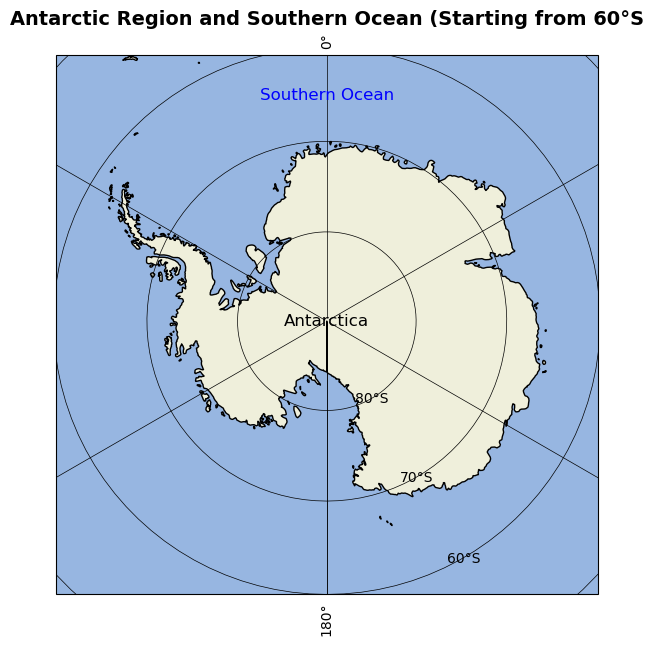

In [71]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import numpy as np

extent = [-180, 180, -90, -60]  
central_lon = 0  
central_lat = -90 

plt.figure(figsize=(12, 7))
ax = plt.axes(projection=ccrs.SouthPolarStereo()) 
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')

ax.text(0, -65, 'Southern Ocean', transform=ccrs.PlateCarree(), fontsize=12, ha='center', va='center', color='blue')
ax.text(0, -90, 'Antarctica', transform=ccrs.PlateCarree(), fontsize=12, ha='center', va='center', color='black')
ax.gridlines(draw_labels=True, color='black', linewidth=0.5)

plt.title("Antarctic Region and Southern Ocean (Starting from 60°S", fontsize=14, fontweight='bold')
plt.show()

2. A Map to Show The South Atlantic (from 20°S to 50°S). Containing the points of the following Locations: Walvis Bay, Cape Town, Rio de Janeiro, Montevideo:

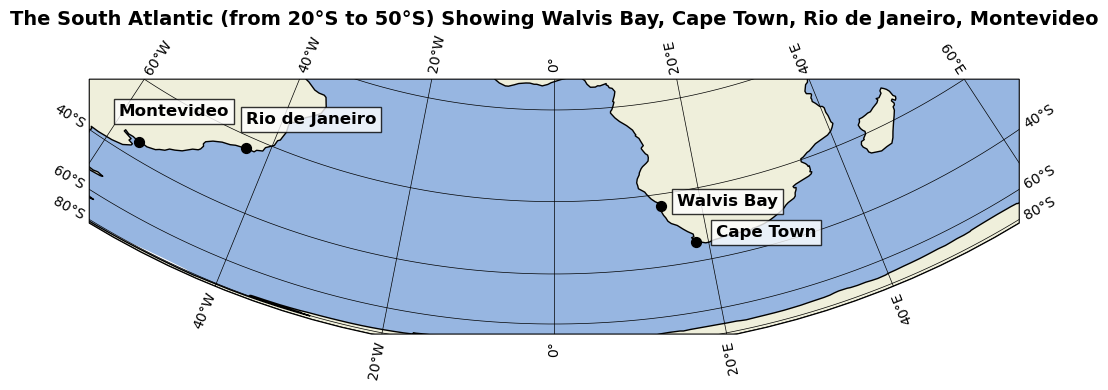

In [121]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='educational')

extent = [-60, 60, -50, -20]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

places = ['Walvis Bay', 'Cape Town', 'Rio de Janeiro', 'Montevideo']
addresses = []

for place in places:
    loc = geolocator.geocode(place, language="en")
    addresses.append(loc)

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')

ax.gridlines(draw_labels=True, color='black', linewidth=0.5)

label_offsets = {
    'Walvis Bay': (9.0, -2.0),   
    'Cape Town': (9.0, -2.0),   
    'Rio de Janeiro': (7.0, 12.0),
    'Montevideo': (2.0, 12.0)     
}

for i, place in enumerate(places):
    lon, lat = addresses[i].longitude, addresses[i].latitude

    ax.scatter(lon, lat, color='black', marker='o', s=50, transform=ccrs.PlateCarree(), edgecolor='black', linewidth=1)
    
    offset_lon, offset_lat = label_offsets[place]
    
    ax.text(
        lon + offset_lon, lat + offset_lat, place,
        transform=ccrs.PlateCarree(),
        fontsize=12, fontweight='bold', color='black',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='square,pad=0.3'),
        ha='center', va='center'  
    )

plt.title("The South Atlantic (from 20°S to 50°S) Showing Walvis Bay, Cape Town, Rio de Janeiro, Montevideo", fontsize=14, fontweight='bold')
plt.show()

3. Three Panels to Show The False Bay Coastline at Low, Intermediete and Full Resolutions (From The GSHHG Database):

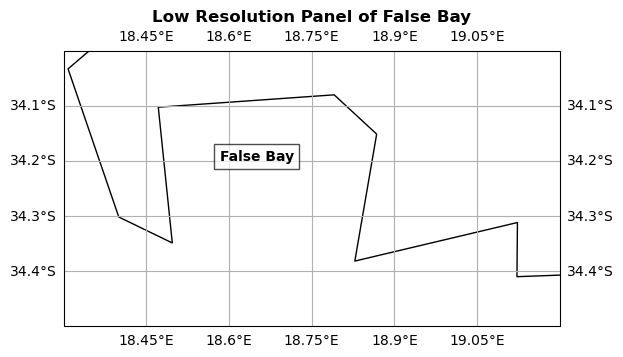

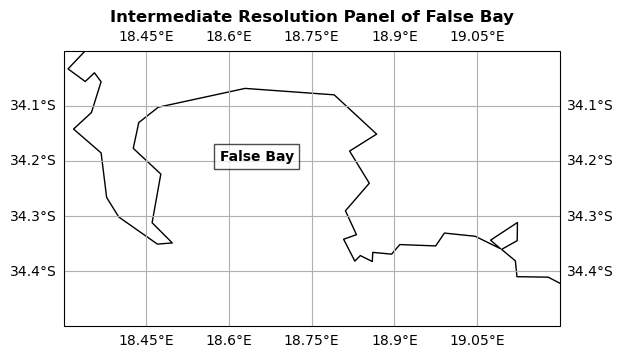

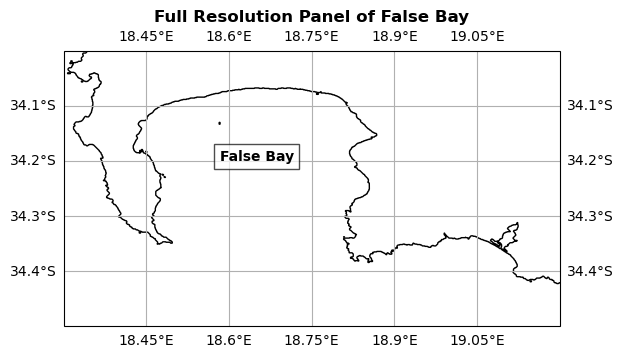

In [143]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

label_x, label_y = 18.65, -34.2

cl_low = cfeature.GSHHSFeature(scale='l')
extent = [18.3, 19.2, -34.5, -34.0]
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.add_feature(cl_low)
ax.gridlines(draw_labels=True)
ax.text(label_x, label_y, "False Bay", fontsize=10, fontweight='bold',
        ha='center', bbox=dict(facecolor='white', edgecolor='black', alpha=0.7))
plt.title("Low Resolution Panel of False Bay", fontsize=12, fontweight='bold')
plt.show()

cl_int = cfeature.GSHHSFeature(scale='i')
extent = [18.3, 19.2, -34.5, -34.0]
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.add_feature(cl_int)
ax.gridlines(draw_labels=True)
ax.text(label_x, label_y, "False Bay", fontsize=10, fontweight='bold',
        ha='center', bbox=dict(facecolor='white', edgecolor='black', alpha=0.7))
plt.title("Intermediate Resolution Panel of False Bay", fontsize=12, fontweight='bold')
plt.show()

cl_full= cfeature.GSHHSFeature(scale='f')
extent = [18.3, 19.2, -34.5, -34.0]
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.add_feature(cl_full)
ax.gridlines(draw_labels=True)
ax.text(label_x, label_y, "False Bay", fontsize=10, fontweight='bold',
        ha='center', bbox=dict(facecolor='white', edgecolor='black', alpha=0.7))
plt.title("Full Resolution Panel of False Bay", fontsize=12, fontweight='bold')
plt.show()